In [22]:
# Importing libraries and important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

## (a) Perform a simple linear regression  with mpg as the response and horsepower as the predictor.

In [38]:
# Loading dataset and model
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)
auto_data = load_data('Auto')

In [24]:
auto_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [25]:
# Separate the predictor and response variable
design = MS(['horsepower'])
X = design.fit_transform(auto_data)
y = auto_data['mpg']

In [26]:
# Fit the model
model = sm.OLS(y, X)
results = model.fit()

### i. Is there a relationship between the predictor and the response?

In [27]:
# Displaying the summary of model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        13:20:55   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* P value correspondes to the t statistic is very low, indicating clear relation between predictor and response

### ii. How strong is the relationship between the predictor and the response?

In [28]:
# Calculating R squared
R2 = results.rsquared
R2

0.6059482578894348

* As from above calculation R square is close to 1, indicating strong relationship between horsepower and mpg.

### iii Is the relationship between the predictor and the response positive or negative?

In [29]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


* As see in above table the value of horsepower's coefficient is negative which indicates the relationship is negative.

### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [30]:
# Predict the value of mpg when horsepower is 98
newX = pd.DataFrame({'horsepower': [98]})
newX = design.transform(newX)
new_prediction = results.get_prediction(newX)
predicted_mpg = new_prediction.predicted_mean
print(f"When the horsepower is 98, the value of mpg: {predicted_mpg}")

When the horsepower is 98, the value of mpg: [24.46707715]


In [31]:
'Confidence interval: ', new_prediction.conf_int(alpha = 0.05)

('Confidence interval: ', array([[23.97307896, 24.96107534]]))

In [32]:
'Prediction interval: ', new_prediction.conf_int(obs = True, alpha = 0.05)

('Prediction interval: ', array([[14.80939607, 34.12475823]]))

## (b) Plot the response and the predictor in a new set of axes and o display the least squares regression line.

In [33]:
# Define function to display least square regression line
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs, label = 'Regression line')
    ax.legend()

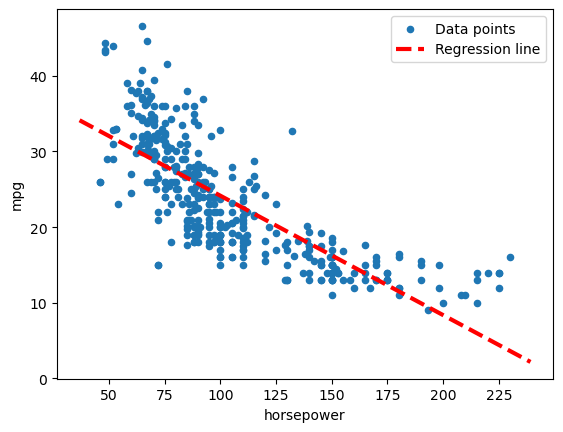

In [34]:
ax = auto_data.plot.scatter('horsepower', 'mpg', label = 'Data points')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

## (c) Produce some of diagnostic plots of the least squares regression fit.ft.

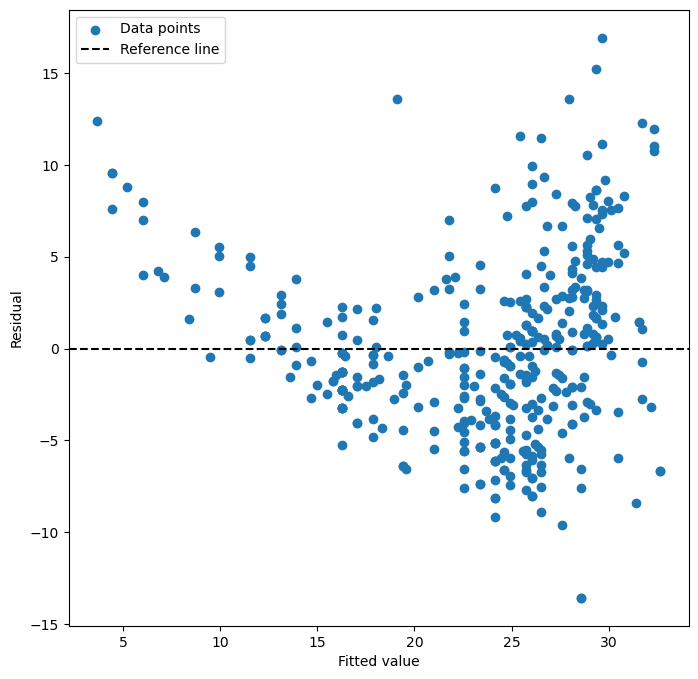

In [35]:
# Plotting the residual plot
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid, label = 'Data points')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--', label = 'Reference line')
ax.legend();

* The above plot indicates that their is non-linear relationship between horsepower and mpg

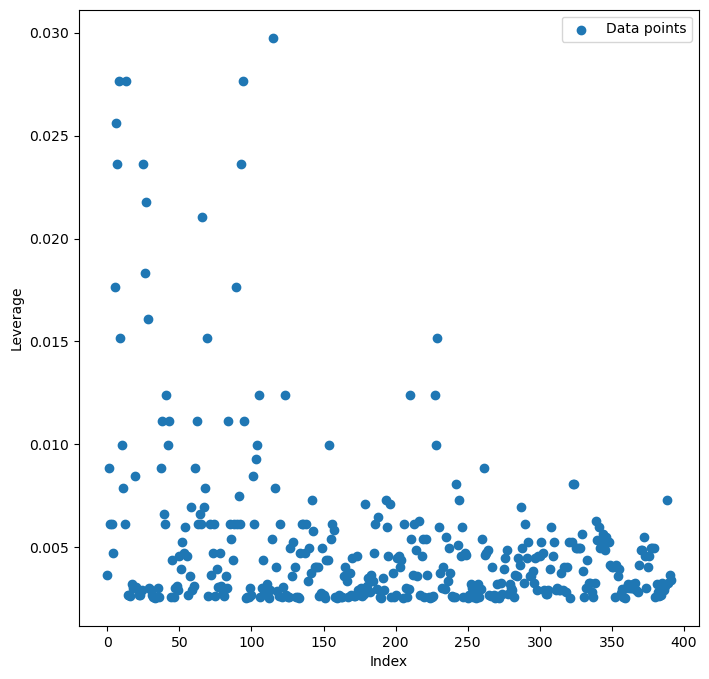

In [36]:
# Plotting the leverage statistics
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, label = 'Data points')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
ax.legend()